libraries

In [1]:
# Data Wrangling
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import font_manager, rc

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import FeatureUnion

from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile
from sklearn.preprocessing import PolynomialFeatures

# Modeling
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.ensemble import VotingClassifier
from vecstack import stacking
from scipy.stats.mstats import gmean

# Evaluation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit

# Utility
import os
import time
import random
import warnings; warnings.filterwarnings("ignore")
from IPython.display import Image
from sklearn.externals import joblib
import pickle
from itertools import combinations
import gc
from tqdm import tqdm
import platform

# Keras
import tensorflow as tf
# Tensorflow warning off
if tf.__version__[0] < '2':
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
    tf.logging.set_verbosity(tf.logging.ERROR)
import keras
from keras import backend as K
from keras.layers import * #Input, Dense
from keras.models import * #Model
from keras.optimizers import *
from keras.initializers import *
from keras.regularizers import *
from keras.constraints import *
from keras.utils.np_utils import *
from keras.utils.vis_utils import * #model_to_dot
from keras.preprocessing.image import *
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import *

from keras.models import Model, Sequential
from keras import Input
from keras import layers
from keras.optimizers import RMSprop
from keras.constraints import max_norm
from keras.callbacks import EarlyStopping


Using TensorFlow backend.


read data & set seed

# 중분류 구매건수
 - 대분류 구매건수, 소분류 구매건수는 0.7안나옴. 중분류로 가야할듯

In [133]:
# read data
df_train = pd.read_csv('X_train.csv', encoding='cp949')
df_test = pd.read_csv('X_test.csv', encoding='cp949')
y_train = pd.read_csv('y_train.csv', encoding='cp949').gender
IDtest = df_test['cust_id'].unique()

# set seed
seed = 2020
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# 띄어쓰기, 점, 콤마, 세로바 없애기

before = [
# 띄어쓰기
'기초 화장품', '니  트', '캐릭터 여화', '캐릭터 남화', '수      저', '4대 B/D', 'N/B 아동복', '수입 아동복', '스낵형 델리','수입청소기 외','영 캐릭터','영 트렌디','식기 단독매입','커       튼','생활잡화 단독매입',
'가구 단독매입','커리어 행사','가 방','패션 단독매입','시티 단독매입','신생아완구 단독매입','MP3 外','인텔리젼스 행사',
'구두 단독매입','시네마 매점','시티웨어 행사','장신 단독매입','NB 남화','남성시티 직매입','영플라자 (올리브핫스텁)',
'색조 화장품','NB 여화','직수입 골프의류','트래디 행사','IT 게임기,S/W','TAKE OUT','주방 단독매입','셔츠 직매입(PB)', '남성정장 직매입',
# 점
'N.B정장', '즉석.스넥(매장)','N.B', 'L.B',
# 콤마
'기타(가발,포장,담배,끽연구,사진,수선)', '원목,학생,철재',  
# 세로바
'N/B골프의류', 'L/C 아동복', 'L/C골프의류', '4대B/D', '우/양산(특정)', 'N/B아동복', 'L/C정장', '국산A/V','수입A/V','영플라자(진/유니)',
'IT게임기,S/W', '피아노/악기',
] 

after = ['기초화장품', '니트', '캐릭터여화', '캐릭터남화', '수저', '4대B/D', 'N/B아동복', '수입아동복', '스낵형델리','수입청소기외','영캐릭터','영트렌디','식기단독매입','커튼','생활잡화단독매입','가구단독매입',
'커리어행사','가방','패션단독매입','시티단독매입','신생아완구단독매입','MP3外','인텔리젼스행사','구두단독매입','시네마매점','시티웨어행사','장신단독매입','NB남화','남성시티직매입','영플라자(올리브핫스텁)',
'색조화장품','NB여화','직수입골프의류','트래디행사','IT게임기,S/W','TAKEOUT','주방단독매입','셔츠직매입(PB)', '남성정장직매입',
'NB정장', '즉석스넥(매장)','NB', 'LB', '기타(가발포장담배끽연구사진수선)', '원목학생철재',
'NB골프의류', 'LC아동복', 'LC골프의류', '4대BD', '우양산(특정)', 'NB아동복', 'LC정장', '국산AV','수입AV','영플라자(진유니)',
'IT게임기SW', '피아노악기',]


df_train.gds_grp_nm = df_train.gds_grp_nm.replace(before, after)
df_test.gds_grp_nm = df_test.gds_grp_nm.replace(before, after)


max_features_nm = 340 # 중분류 nunique = 330
maxlen_nm = 450 # oversample n=3 일때 np.mean: 397
                # 100 결과: 720, 450 결과: 724, 600결과: 718, 500결과: 716
emb_dim_nm = 256 # 임베딩 벡터의 출력 차원. 결과로서 나오는 임베딩 벡터의 크기

# Converts a "gds_grp_nm" to a sequence of indexes in a fixed-size hashing space
# 라벨인코딩처럼 물품들을 모두 숫자로 바꾸어주는 과정
X_train_nm = df_train.groupby('cust_id')['gds_grp_nm'].apply(lambda x: [one_hot(products, max_features_nm)[0] for products in x]).values
X_test_nm = df_test.groupby('cust_id')['gds_grp_nm'].apply(lambda x: [one_hot(products, max_features_nm)[0] for products in x]).values


# oversample2: 
    # 1. unique X(get all products with duplication)
    # 2. replace=True(Restoration extraction)
    # 3. more buy, more oversample
    #       -> if you want to oversample in same ratio, just adjust n=1 to oversample=1, and erase 'for oversample in range(n)'

def oversample2(data, n=1, seed=seed):
    
    np.random.seed(seed)
    
    customerProducts = []
    
    for products in data:
        
        for oversample in range(n):
            
            products = list(np.append(products, np.random.choice(products, len(products) * oversample, replace=True)))
            
        customerProducts.append(products)
        
    return customerProducts

# oversample
X_train_nm = oversample2(X_train_nm, 3)
X_test_nm = oversample2(X_test_nm, 3)
y_train = pd.read_csv('y_train.csv', encoding='cp949').gender


X_train_nm = pad_sequences(X_train_nm, maxlen=maxlen_nm, padding='post', truncating='post', value=0)
X_test_nm = pad_sequences(X_test_nm, maxlen=maxlen_nm, padding='post', truncating='post', value=0)

X_train_nm.shape, X_test_nm.shape


# Split data into train & validatio set
# Train/Validation
i = int(round(X_train_nm.shape[0] * 0.8,0))
X_valid, y_valid = X_train_nm[i:], y_train[i:]
X_train, y_train = X_train_nm[:i], y_train[:i]

build models

In [122]:
# bulid models
model = Sequential(name = 'cnn_model')
model.add(layers.Embedding(max_features_nm, emb_dim_nm))
model.add(layers.Conv1D(32, 3, activation='elu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(32, 3, activation='elu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid'))
# choose the Optimizere and the Cost function
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])


# train the model
hist = model.fit(X_train, y_train, validation_data=(X_valid, y_valid),
                 epochs=100, batch_size=64, #validation_split=0.2,
                 callbacks=[EarlyStopping(patience=3)])

# plt.plot(hist.history['loss'], label='train loss')
# plt.plot(hist.history['val_loss'], label = 'validation loss')
# plt.legend()
# plt.title('loss')
# plt.show()


# evalutate the model performance
# print(model.evaluate(X_valid, y_valid))
# ROC-AUC
print()
print(roc_auc_score(y_valid, model.predict(X_valid)))


Train on 2800 samples, validate on 700 samples
Epoch 1/100
2800/2800 [==============================] - 4s 1ms/step - loss: 0.6458 - acc: 0.6189 - val_loss: 0.6034 - val_acc: 0.6900
Epoch 2/100
2800/2800 [==============================] - 4s 2ms/step - loss: 0.5908 - acc: 0.6900 - val_loss: 0.5957 - val_acc: 0.6829
Epoch 3/100
2800/2800 [==============================] - 4s 1ms/step - loss: 0.5632 - acc: 0.7225 - val_loss: 0.5751 - val_acc: 0.6943
Epoch 4/100
2800/2800 [==============================] - 4s 2ms/step - loss: 0.5506 - acc: 0.7307 - val_loss: 0.5779 - val_acc: 0.6857
Epoch 5/100
2800/2800 [==============================] - 4s 1ms/step - loss: 0.5411 - acc: 0.7393 - val_loss: 0.5822 - val_acc: 0.6900
Epoch 6/100
2800/2800 [==============================] - 4s 2ms/step - loss: 0.5262 - acc: 0.7511 - val_loss: 0.5841 - val_acc: 0.6786

0.7336148179038088


점수에 따른 파라미터 탐색해보기. 어느정도 점수까지 나오는지 확인. 최고목표는 0.74

In [135]:
con1st = [4, 8, 16, 32]
pooling1st = [2,3]
con2nd = [4, 8, 16, 32]
drop1st = [0.2,0.3,0.4]

for con1 in con1st:
    
    for pool in pooling1st:
            
        for con2 in con2nd:

            for drop in drop1st:
                
                        

# bulid models
                model = Sequential(name = 'cnn_model')
                model.add(layers.Embedding(max_features_nm, emb_dim_nm))
                model.add(layers.Conv1D(con1, con1k, activation='elu'))
                model.add(layers.MaxPooling1D(pool))
                model.add(layers.Conv1D(con2, con2k, activation='elu'))
                model.add(layers.GlobalMaxPooling1D())
                model.add(layers.Dropout(drop))
                model.add(layers.Dense(1, activation='sigmoid'))
# choose the Optimizere and the Cost function
                model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])


# train the model
                hist = model.fit(X_train, y_train, validation_data=(X_valid, y_valid),
                                         epochs=100, batch_size=64, verbose = 0,#validation_split=0.2,
                                         callbacks=[EarlyStopping(patience=3)])

# plt.plot(hist.history['loss'], label='train loss')
# plt.plot(hist.history['val_loss'], label = 'validation loss')
# plt.legend()
# plt.title('loss')
# plt.show()


# evalutate the model performance
# print(model.evaluate(X_valid, y_valid))
# ROC-AUC
                if roc_auc_score(y_valid, model.predict(X_valid)) >= 0.73:
                    print(f'1층: {con1},{con1k}, 풀사이즈: {pool}, 2층: {con2},{con2k}, 드롭비율: {drop}')
                    print(roc_auc_score(y_valid, model.predict(X_valid)))







1층: 42, 풀사이즈: 2, 2층: 84, 드롭비율: 0.2
0.7335453155407284



1층: 42, 풀사이즈: 2, 2층: 164, 드롭비율: 0.2
0.7334497497914929



















1층: 82, 풀사이즈: 2, 2층: 44, 드롭비율: 0.3
0.734366312204615








1층: 82, 풀사이즈: 2, 2층: 324, 드롭비율: 0.2
0.7344054072838477








1층: 82, 풀사이즈: 3, 2층: 84, 드롭비율: 0.4
0.7316948151237141












1층: 162, 풀사이즈: 2, 2층: 84, 드롭비율: 0.4
0.7338754517653601

1층: 162, 풀사이즈: 2, 2층: 164, 드롭비율: 0.2
0.7303829580205727



1층: 162, 풀사이즈: 2, 2층: 324, 드롭비율: 0.2
0.7302960800667223







1층: 162, 풀사이즈: 3, 2층: 84, 드롭비율: 0.3
0.730044134000556











1층: 322, 풀사이즈: 2, 2층: 84, 드롭비율: 0.2
0.731625312760634








1층: 322, 풀사이즈: 2, 2층: 324, 드롭비율: 0.4
0.7361082151793161







1층: 322, 풀사이즈: 3, 2층: 164, 드롭비율: 0.2
0.7303916458159577







# DNN 대분류 구매건수에서 파라미터 탐색

In [136]:
df_train = pd.read_csv('X_train.csv', encoding='cp949')
df_test = pd.read_csv('X_test.csv', encoding='cp949')
y_train = pd.read_csv('y_train.csv', encoding='cp949').gender
IDtest = df_test.cust_id.unique()


level = 'gds_grp_mclas_nm'

train_test = pd.pivot_table(pd.concat([df_train, df_test]), index='cust_id', columns=level, values='amount',
                            aggfunc=lambda x: len(x), fill_value=0).reset_index()


# 이상치(outlier)를 제거한다.
train_test.iloc[:,1:] = train_test.iloc[:,1:].apply(lambda x: x.clip(x.quantile(.05), x.quantile(.95)), axis=0)

# 왼쪽으로 치우진 분포를 정규분포로 바꾸기 위해 로그 변환을 수행한다. -> 0.769
train_test.iloc[:,1:] = np.log1p(train_test.iloc[:,1:])

#from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
train_test.iloc[:, 1:] = mmscaler.fit_transform(train_test.iloc[:,1:])

# 특성 차원이 너무 많을 경우 과적합이 발생하기 때문에 차원 축소를 실행한다.
max_d = num_d = train_test.shape[1] - 1
pca = PCA(n_components=max_d, random_state=0).fit(train_test.iloc[:,1:])
cumsum = np.cumsum(pca.explained_variance_ratio_) #분산의 설명량을 누적합
num_d = np.argmax(cumsum >= 0.99) + 1             # 분산의 설명량이 99%이상 되는 차원의 수
if num_d == 1: num_d = max_d
pca = PCA(n_components=num_d, random_state=0).fit_transform(train_test.iloc[:,1:])
train_test = pd.concat([train_test.iloc[:,0], pd.DataFrame(pca)], axis=1)
display(train_test)

# 전처리 후 학습용과 제출용 데이터로 분리한다.
X_train = train_test.query('cust_id not in @IDtest').drop('cust_id', axis=1)
X_test = train_test.query('cust_id in @IDtest').drop('cust_id', axis=1)


seed = 2020
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

i = int(round(X_train.shape[0] * 0.8, 0))
X_valid, y_valid = X_train[i:], y_train[i:]
X_train, y_train = X_train[:i], y_train[:i]

,cust_id,0,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,32,33,34
0,0,0.808812,0.047621,-0.382530,0.136842,0.068270,-1.067826,0.097073,0.064659,0.123847,...,0.278258,-0.198159,-0.226099,-0.038080,0.324296,-0.434571,-0.308631,-0.016363,0.194200,-0.018975
1,1,-0.942326,0.181016,0.039485,0.224548,0.165447,0.185474,0.260437,0.067577,-0.233817,...,-0.035076,-0.147834,0.062239,0.060819,-0.054463,-0.387346,0.112056,-0.059185,0.006323,-0.030976
2,2,-0.939487,0.072728,-0.171136,0.257513,-0.163384,-0.015842,-0.109646,0.098185,-0.189282,...,0.057341,0.047966,-0.038936,-0.112071,-0.006490,0.062245,-0.004990,0.035366,0.044459,0.039179
3,3,0.176414,-0.540114,-0.095850,0.039596,0.054163,0.377580,0.169790,-0.019942,0.183439,...,0.156863,-0.014416,-0.061704,0.120444,-0.374014,0.177117,-0.243579,0.075744,-0.142311,-0.229687
4,4,-1.006475,-0.015659,0.083409,-0.036429,0.082568,-0.020770,0.012661,-0.029358,0.030033,...,0.008659,0.040425,-0.007492,0.042274,0.049531,-0.034650,-0.017044,-0.018064,0.021210,-0.000362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,-0.527805,0.460797,-0.064967,-0.029257,0.232430,-0.141500,0.104384,0.065651,-0.706434,...,-0.477599,0.215720,0.023805,0.367133,0.026163,0.424302,-0.089105,-0.048746,0.062714,-0.055811
5978,5978,-1.038196,0.022598,0.023371,-0.003908,0.008111,0.030509,-0.068062,-0.030968,0.011029,...,0.106910,0.017061,0.158339,-0.014808,-0.045128,0.014905,-0.012643,-0.058065,0.033216,-0.046763
5979,5979,0.672151,1.288926,0.047105,0.442555,-0.225962,0.620944,-0.542938,-0.306575,-0.724191,...,-0.267473,0.172990,0.246498,-0.123809,-0.203993,-0.005225,-0.029028,0.124641,0.155520,0.100988
5980,5980,-0.561052,-0.015907,0.100263,0.082922,-0.023670,0.353346,0.424770,-0.039177,0.215357,...,0.149904,-0.020741,-0.158265,0.161862,-0.201403,-0.103223,-0.567873,-0.410687,-0.080075,0.002968


In [137]:
dr1st = dense_range_1st_layer = [4, 8, 16, 32]
dr2nd = dense_range_2nd_layer = [4, 8, 16, 32]
dr3rd = dense_range_3rd_layer = [4, 8, 16, 32]
drop1st = dropout_range_1st_layer = [0, 0.2, 0.3, 0.4, 0.5]
drop2nd = dropout_range_2nd_layer = [0, 0.2, 0.3, 0.4, 0.5]

for dr1 in dr1st:
    
    for drop1 in drop1st:
    
        for dr2 in dr2nd:
        
            for drop2 in drop2nd:
                
                for dr3 in dr3rd:
                    
                    
# model architecture
                    model = Sequential(name = 'dnn model')
                    model.add(Dense(dr1, input_shape=(X_train.shape[1],), activation='relu'))
                    model.add(Dropout(drop1))
                    model.add(Dense(dr2, activation='relu'))
                    model.add(Dropout(drop2))
                    model.add(Dense(dr3, activation='relu'))
                    model.add(Dense(1, activation='sigmoid'))

# choose the optimizer and the cost function
                    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

# model.summary()


# train the model -> verbose=0: silent
                    callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=25)]

                    hist = model.fit(X_train, y_train, validation_data=(X_valid, y_valid),
                        batch_size=64, epochs=200, callbacks=callbacks, verbose=0)

# visualize training history
# plt.plot(hist.history['loss'], label='train loss')
# plt.plot(hist.history['val_loss'], label='validation loss')
# plt.legend()
# plt.xlabel('epoch')
# plt.title('Loss')
# plt.show()


# plt.plot(hist.history['acc'], label='train acc')
# plt.plot(hist.history['val_acc'], label='validation acc')
# plt.legend()
# plt.xlabel('epoch')
# plt.title('acc')
# plt.show()

# evaluate the model performance

#print(model.evaluate(X_test, y_test))
                    if roc_auc_score(y_valid, model.predict(X_valid)) >= 0.755:
                        print(f'1층: {dr1},드롭1: {drop1},2층: {dr2}, 드롭2: {drop2}, 3층: {dr3}')
                        print(roc_auc_score(y_valid, model.predict(X_valid)))
#print(roc_auc_score(y_valid, model.predict(X_valid)))

1층: 4,드롭1: 0,2층: 4, 드롭2: 0, 3층: 16
0.7602993814289687
1층: 4,드롭1: 0,2층: 4, 드롭2: 0.2, 3층: 8
0.7619804698359743
1층: 4,드롭1: 0,2층: 4, 드롭2: 0.2, 3층: 16
0.7564246246872393
1층: 4,드롭1: 0,2층: 4, 드롭2: 0.3, 3층: 32
0.7561292396441479
1층: 4,드롭1: 0,2층: 4, 드롭2: 0.4, 3층: 8
0.76107693911593
1층: 4,드롭1: 0,2층: 4, 드롭2: 0.5, 3층: 32
0.7579971156519323
1층: 4,드롭1: 0,2층: 8, 드롭2: 0, 3층: 4
0.7639656310814568
1층: 4,드롭1: 0,2층: 8, 드롭2: 0, 3층: 16
0.7556166597164303
1층: 4,드롭1: 0,2층: 8, 드롭2: 0, 3층: 32
0.7555905963302753
1층: 4,드롭1: 0,2층: 8, 드롭2: 0.5, 3층: 4
0.7576148526549904
1층: 4,드롭1: 0,2층: 8, 드롭2: 0.5, 3층: 8
0.7556166597164303
1층: 4,드롭1: 0,2층: 8, 드롭2: 0.5, 3층: 16
0.7635963997775924
1층: 4,드롭1: 0,2층: 16, 드롭2: 0, 3층: 8
0.7608988393105366
1층: 4,드롭1: 0,2층: 16, 드롭2: 0, 3층: 32
0.7564029051987768
1층: 4,드롭1: 0,2층: 16, 드롭2: 0.3, 3층: 4
0.7604123227689742
1층: 4,드롭1: 0,2층: 16, 드롭2: 0.3, 3층: 32
0.7637875312760634
1층: 4,드롭1: 0,2층: 16, 드롭2: 0.5, 3층: 32
0.7567156658326384
1층: 4,드롭1: 0,2층: 32, 드롭2: 0, 3층: 8
0.7558077912149013
1층: 4,드롭1:

MemoryError: 

# DNN 대분류 구매건수에서 파라미터 탐색

In [2]:
X_train = pd.read_csv('train_numbersOfPurchase_nm_percentile.csv', encoding='cp949')
X_test = pd.read_csv('train_numbersOfPurchase_nm_percentile.csv', encoding='cp949')
y_train = pd.read_csv('y_train.csv', encoding='cp949').gender

seed = 2020
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

i = int(round(X_train.shape[0] * 0.8, 0))
X_valid, y_valid = X_train[i:], y_train[i:]
X_train, y_train = X_train[:i], y_train[:i]

In [ ]:
dr1st = dense_range_1st_layer = [4, 8, 16, 32]
dr2nd = dense_range_2nd_layer = [4, 8, 16, 32]
dr3rd = dense_range_3rd_layer = [4, 8, 16, 32]
drop1st = dropout_range_1st_layer = [0, 0.2, 0.3, 0.4, 0.5]
drop2nd = dropout_range_2nd_layer = [0, 0.2, 0.3, 0.4, 0.5]

for dr1 in dr1st:
    
    for drop1 in drop1st:
    
        for dr2 in dr2nd:
        
            for drop2 in drop2nd:
                
                for dr3 in dr3rd:
                    
                    
# model architecture
                    model = Sequential(name = 'dnn model')
                    model.add(Dense(dr1, input_shape=(X_train.shape[1],), activation='relu'))
                    model.add(Dropout(drop1))
                    model.add(Dense(dr2, activation='relu'))
                    model.add(Dropout(drop2))
                    model.add(Dense(dr3, activation='relu'))
                    model.add(Dense(1, activation='sigmoid'))

# choose the optimizer and the cost function
                    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

# model.summary()


# train the model -> verbose=0: silent
                    callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=25)]

                    hist = model.fit(X_train, y_train, validation_data=(X_valid, y_valid),
                        batch_size=64, epochs=200, callbacks=callbacks, verbose=0)

# visualize training history
# plt.plot(hist.history['loss'], label='train loss')
# plt.plot(hist.history['val_loss'], label='validation loss')
# plt.legend()
# plt.xlabel('epoch')
# plt.title('Loss')
# plt.show()


# plt.plot(hist.history['acc'], label='train acc')
# plt.plot(hist.history['val_acc'], label='validation acc')
# plt.legend()
# plt.xlabel('epoch')
# plt.title('acc')
# plt.show()

# evaluate the model performance

#print(model.evaluate(X_test, y_test))
                    if roc_auc_score(y_valid, model.predict(X_valid)) >= 0.76:
                        print(f'1층: {dr1},드롭1: {drop1},2층: {dr2}, 드롭2: {drop2}, 3층: {dr3}')
                        print(roc_auc_score(y_valid, model.predict(X_valid)))
#print(roc_auc_score(y_valid, model.predict(X_valid)))

1층: 4,드롭1: 0,2층: 4, 드롭2: 0.2, 3층: 8
0.768357311648596
1층: 4,드롭1: 0,2층: 4, 드롭2: 0.3, 3층: 8
0.7686005699193773
1층: 4,드롭1: 0,2층: 4, 드롭2: 0.3, 3층: 16
0.7651297956630525
1층: 4,드롭1: 0,2층: 4, 드롭2: 0.4, 3층: 4
0.7660550458715596
1층: 4,드롭1: 0,2층: 4, 드롭2: 0.4, 3층: 8
0.7633487976091187
1층: 4,드롭1: 0,2층: 4, 드롭2: 0.4, 3층: 32
0.7630707881567974
1층: 4,드롭1: 0,2층: 8, 드롭2: 0, 3층: 16
0.7644738671114817
1층: 4,드롭1: 0,2층: 8, 드롭2: 0.2, 3층: 16
0.7607728662774534
1층: 4,드롭1: 0,2층: 8, 드롭2: 0.3, 3층: 16
0.7671974909646929
1층: 4,드롭1: 0,2층: 8, 드롭2: 0.4, 3층: 16
0.7615895190436475
1층: 4,드롭1: 0,2층: 8, 드롭2: 0.4, 3층: 32
0.7626146788990825
1층: 4,드롭1: 0,2층: 8, 드롭2: 0.5, 3층: 8
0.7602342229635807
1층: 4,드롭1: 0,2층: 8, 드롭2: 0.5, 3층: 32
0.7638744092299138
1층: 4,드롭1: 0,2층: 16, 드롭2: 0, 3층: 4
0.7608336808451488
1층: 4,드롭1: 0,2층: 16, 드롭2: 0, 3층: 16
0.7669629204892967
1층: 4,드롭1: 0,2층: 16, 드롭2: 0.2, 3층: 16
0.76059476647206
1층: 4,드롭1: 0,2층: 16, 드롭2: 0.3, 3층: 16
0.7605209202112871
1층: 4,드롭1: 0,2층: 16, 드롭2: 0.3, 3층: 32
0.7614331387267167
1층

In [ ]:
1층: 4,드롭1: 0,2층: 4, 드롭2: 0.2, 3층: 8
0.768357311648596
1층: 4,드롭1: 0,2층: 4, 드롭2: 0.3, 3층: 8
0.7686005699193773
1층: 4,드롭1: 0.2,2층: 8, 드롭2: 0.4, 3층: 16
0.7693042813455657
1층: 4,드롭1: 0.2,2층: 16, 드롭2: 0.4, 3층: 32
0.7694693494578817
1층: 4,드롭1: 0.2,2층: 32, 드롭2: 0.5, 3층: 4
0.7705075410063942
1층: 4,드롭1: 0.3,2층: 8, 드롭2: 0.5, 3층: 16
0.7712503475118155
1층: 4,드롭1: 0.3,2층: 16, 드롭2: 0, 3층: 8
0.7699993049763693

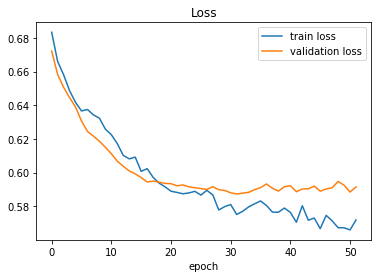

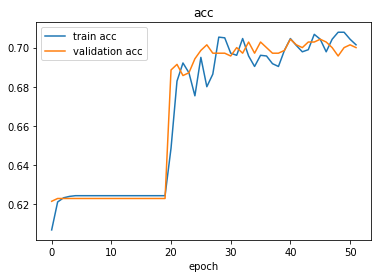

0.7537487837086461


In [17]:


# model architecture
model = Sequential(name = 'dnn model')
model.add(Dense(4, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# choose the optimizer and the cost function
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

# model.summary()


# train the model -> verbose=0: silent
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)]

hist = model.fit(X_train, y_train, validation_data=(X_valid, y_valid),
    batch_size=64, epochs=200, callbacks=callbacks, verbose=0)

# visualize training history
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend()
plt.xlabel('epoch')
plt.title('Loss')
plt.show()


plt.plot(hist.history['acc'], label='train acc')
plt.plot(hist.history['val_acc'], label='validation acc')
plt.legend()
plt.xlabel('epoch')
plt.title('acc')
plt.show()

# evaluate the model performance

#print(model.evaluate(X_test, y_test))
#if roc_auc_score(y_valid, model.predict(X_valid)) >= 0.76:
#    print(f'1층: {dr1},드롭1: {drop1},2층: {dr2}, 드롭2: {drop2}, 3층: {dr3}')
#    print(roc_auc_score(y_valid, model.predict(X_valid)))
print(roc_auc_score(y_valid, model.predict(X_valid)))

make submissions

In [123]:
pred = model.predict(X_test_nm)[:,0]

In [124]:
pred[:50]

array([0.67190474, 0.20511281, 0.34479558, 0.33598548, 0.28668523,
       0.11219993, 0.15591887, 0.8440552 , 0.22450674, 0.23399863,
       0.13307652, 0.18616879, 0.5870636 , 0.1251514 , 0.4193209 ,
       0.11329418, 0.07618114, 0.04611889, 0.29937458, 0.50580615,
       0.8221334 , 0.5818527 , 0.622583  , 0.2782574 , 0.12474048,
       0.4268493 , 0.23748687, 0.94999003, 0.59353256, 0.18912378,
       0.18820241, 0.8310955 , 0.02972856, 0.38914555, 0.49429414,
       0.06746712, 0.12683025, 0.760206  , 0.5869742 , 0.71623427,
       0.2318025 , 0.21068504, 0.16045535, 0.578713  , 0.16923162,
       0.34947008, 0.35844445, 0.30999365, 0.76426876, 0.2428649 ],
      dtype=float32)

In [125]:
fname = 'submission_conv1d_nm733.csv'
submissions = pd.concat([pd.Series(IDtest, name="cust_id"), pd.Series(pred, name="gender")] ,axis=1)
submissions.to_csv(fname, index=False)
print(f"'{fname}' is ready to submit.")

'submission_conv1d_nm733.csv' is ready to submit.


In [19]:
# submission간 상관관계보기

cnn_sub = pd.read_csv('conv1d_submissions.csv', encoding='cp949').r
dnn_sub = pd.read_csv('submission_dnn_nm.csv',encoding='cp949')
lstm_sub = pd.read_csv('bilstm_submissions.csv', encoding='cp949')
ae_sub = pd.read_csv('ae_0.7521_submissions.csv', encoding='cp949')

subs = pd.merge(cnn_sub, dnn_sub, on='cust_id')
subs = pd.merge(subs, lstm_sub, on='cust_id')
subs = pd.merge(subs, ae_sub, on='cust_id').drop('cust_id', axis=1)



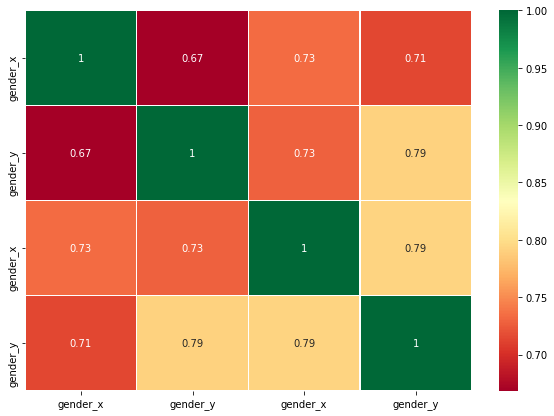

In [27]:
plt.figure(figsize=(10,7))
sns.heatmap(subs.corr(), annot=True, cmap='RdYlGn', linewidths=0.2) #titanic.corr()-->correlation matrix
plt.show()